In [44]:
import pickle
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt

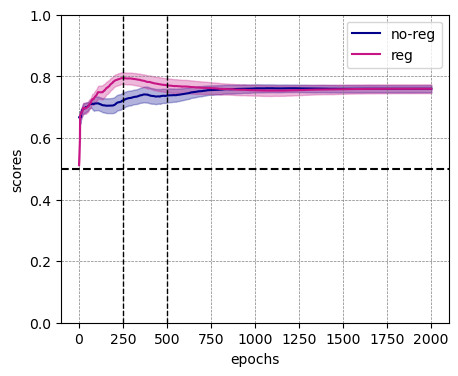

In [45]:
plt.figure(figsize=(5,4))

# bert-small 
with open('../../_data/pascal-data/symmetry-scores/BERT-small-regularizer.pkl', 'rb') as file:
    models = pickle.load(file)

step = models['bert-small-no_bias-encoder-wikipedia'][0]
symmetry_scores = models['bert-small-no_bias-encoder-wikipedia'][2]
var_scores = models['bert-small-no_bias-encoder-wikipedia'][6]
plt.plot(step, symmetry_scores, 
         color = 'darkblue', label = 'no-reg')
plt.fill_between(step, symmetry_scores - var_scores,
                 symmetry_scores + var_scores,
                 color = 'darkblue', alpha = .3)

step = models['bert-small-no_bias-encoder-custom-loss-wikipedia'][0]
symmetry_scores = models['bert-small-no_bias-encoder-custom-loss-wikipedia'][2]
var_scores = models['bert-small-no_bias-encoder-custom-loss-wikipedia'][6]
plt.plot(step, symmetry_scores, 
         color = 'mediumvioletred', label = 'reg')
plt.fill_between(step, symmetry_scores - var_scores,
                 symmetry_scores + var_scores,
                 color = 'mediumvioletred', alpha = .3)

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('scores')
plt.xlabel('epochs')
plt.axvline(x=250,color='k',linestyle='dashed',linewidth = 1)
plt.axvline(x=500,color='k',linestyle='dashed',linewidth = 1)
plt.ylim(0,1)
plt.legend()
plt.axhline(y=.5,color='k',linestyle='dashed')

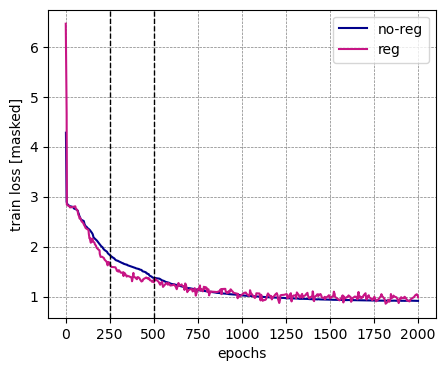

In [46]:
plt.figure(figsize=(5,4))

# bert-small 
with open('../../_data/pascal-data/symmetry-scores/BERT-small-regularizer.pkl', 'rb') as file:
    models = pickle.load(file)

step = models['bert-small-no_bias-encoder-wikipedia'][0]
loss = models['bert-small-no_bias-encoder-wikipedia'][-1]
plt.plot(step, loss, 
         color = 'darkblue', label = 'no-reg')

step = models['bert-small-no_bias-encoder-custom-loss-wikipedia'][0]
loss = models['bert-small-no_bias-encoder-custom-loss-wikipedia'][-1]
plt.plot(step, loss, 
         color = 'mediumvioletred', label = 'reg')


plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('train loss [masked]')
plt.xlabel('epochs')
plt.axvline(x=250,color='k',linestyle='dashed',linewidth = 1)
plt.axvline(x=500,color='k',linestyle='dashed',linewidth = 1)
plt.legend()

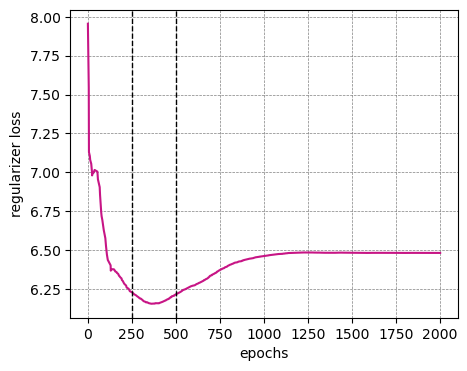

In [47]:
plt.figure(figsize=(5,4))

# bert-small 
with open('../../_data/pascal-data/symmetry-scores/BERT-small-regularizer.pkl', 'rb') as file:
    models = pickle.load(file)

step = models['bert-small-no_bias-encoder-custom-loss-wikipedia'][0]
loss = models['bert-small-no_bias-encoder-custom-loss-wikipedia'][-2]
plt.plot(step, loss, 
         color = 'mediumvioletred', label = 'reg')


plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('regularizer loss')
plt.xlabel('epochs')
plt.axvline(x=250,color='k',linestyle='dashed',linewidth = 1)
plt.axvline(x=500,color='k',linestyle='dashed',linewidth = 1)

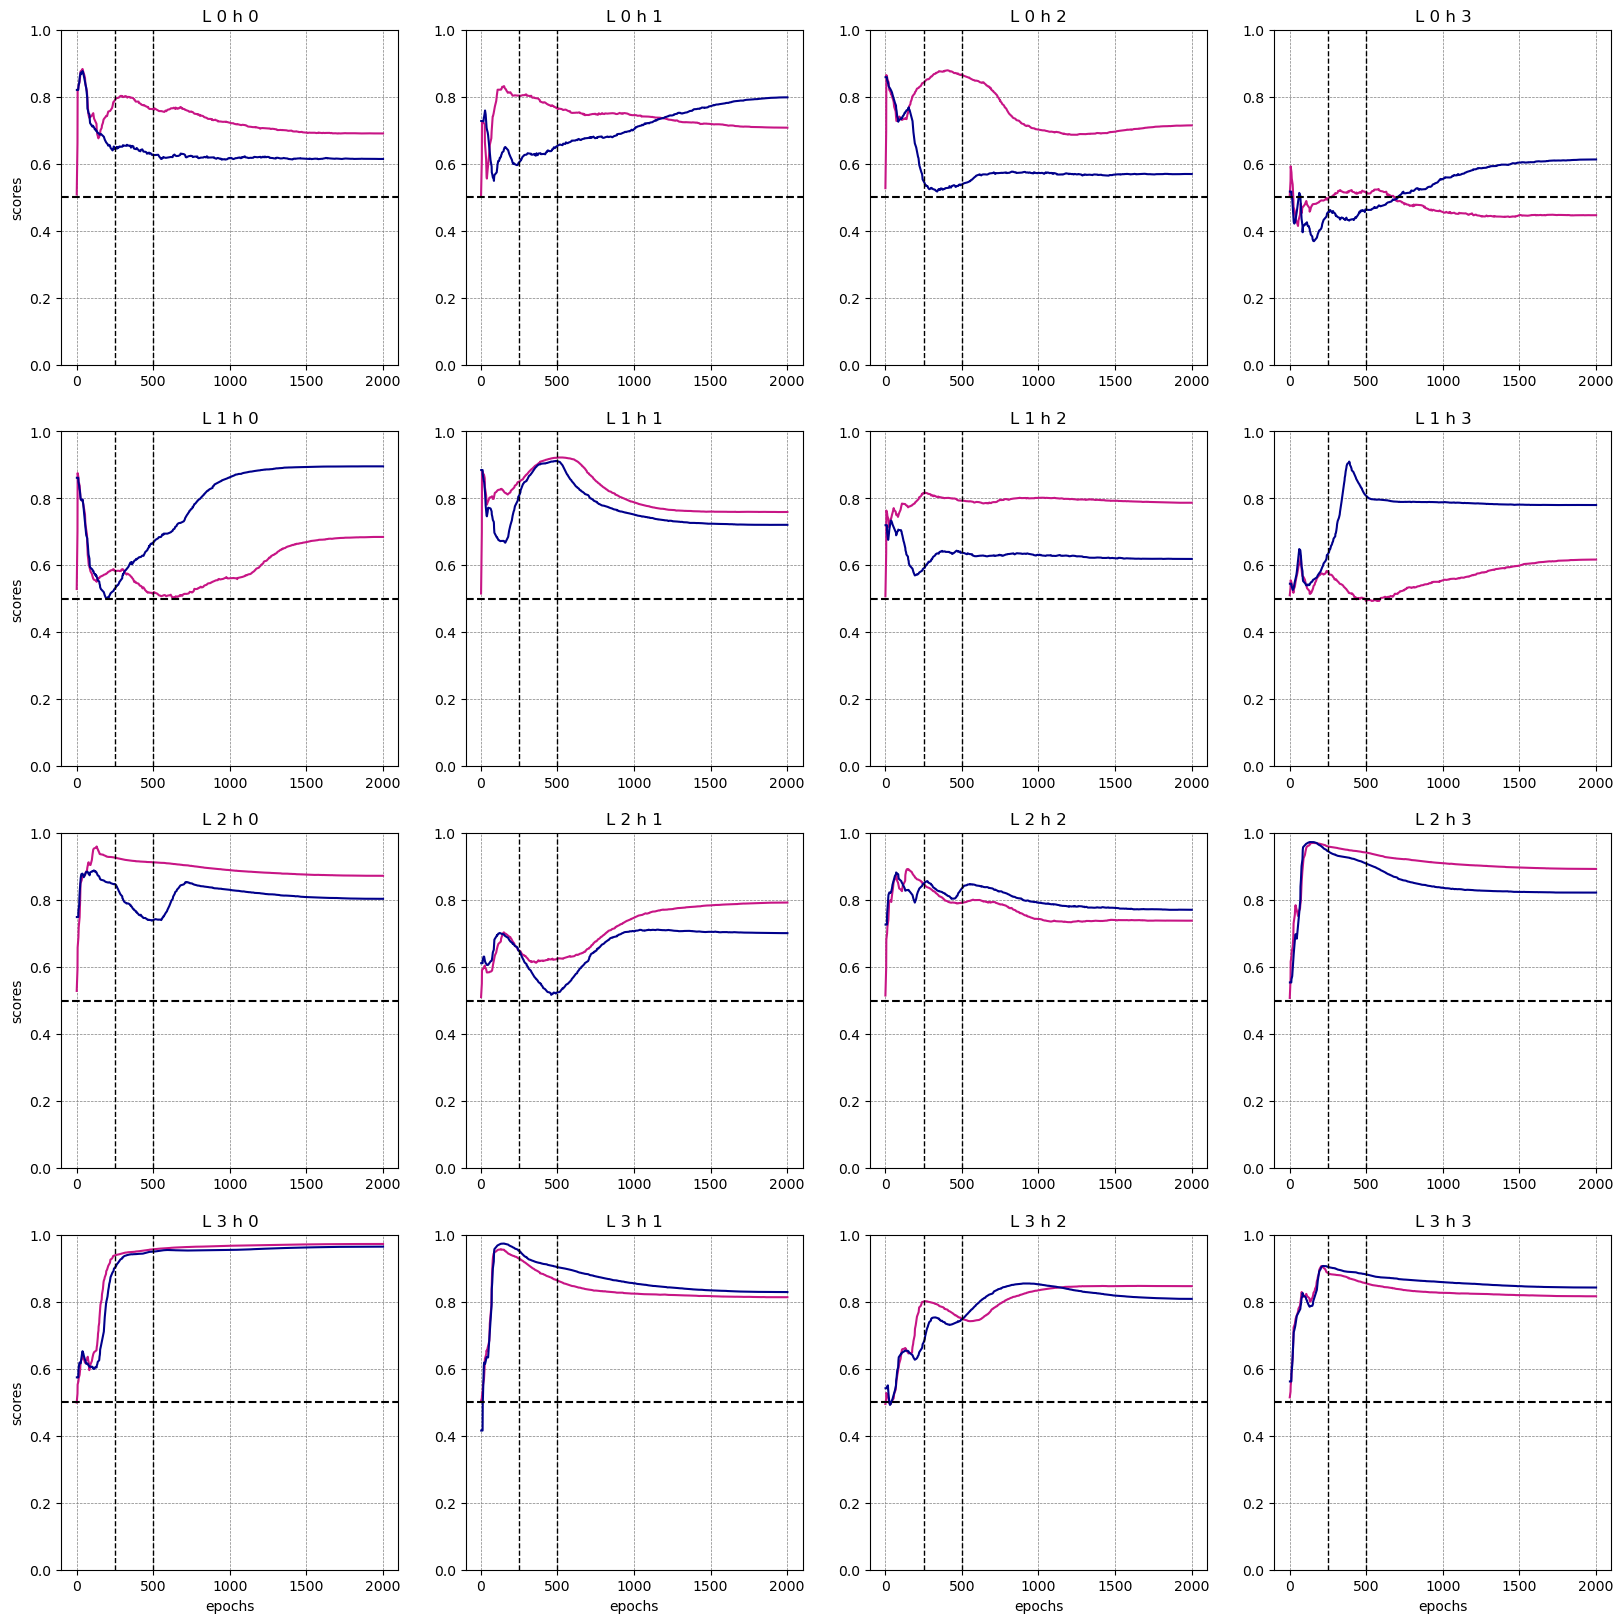

In [57]:
layers = 4
heads = 4

plt.figure(figsize=(5 * heads, 5 * layers))

plt_idx = 1
for l in range(layers):

    for idx in range(heads):

        plt.subplot(layers, heads, plt_idx)

        step = models['bert-small-no_bias-encoder-custom-loss-wikipedia'][0]
        loss = models['bert-small-no_bias-encoder-custom-loss-wikipedia'][7 + heads*l + idx]
        plt.plot(step, loss, color = 'mediumvioletred')

        step = models['bert-small-no_bias-encoder-wikipedia'][0]
        loss = models['bert-small-no_bias-encoder-wikipedia'][7 + heads*l + idx]
        plt.plot(step, loss, color = 'darkblue')

        plt_idx = plt_idx + 1

        plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
        
        if idx == 0: plt.ylabel('scores')
        if l == 3: plt.xlabel('epochs')
        plt.axvline(x=250,color='k',linestyle='dashed',linewidth = 1)
        plt.axvline(x=500,color='k',linestyle='dashed',linewidth = 1)
        plt.ylim(0,1)
        plt.title('L {} h {}'.format(l,idx))
        plt.axhline(y=.5,color='k',linestyle='dashed')